In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
color_distribution = pd.read_csv("Sensor_Color_Distribution.csv")
color_distribution.head(10)

,dist,R,O,Y,G,B
0,0,0.30,0.00,0.00,0.00,0.0
1,1,0.27,0.01,0.00,0.00,0.0
2,2,0.21,0.03,0.00,0.00,0.0
3,3,0.13,0.08,0.00,0.00,0.0
4,4,0.06,0.15,0.01,0.00,0.0
5,5,0.02,0.22,0.03,0.00,0.0
6,6,0.01,0.23,0.08,0.00,0.0
7,7,0.00,0.15,0.15,0.00,0.0
8,8,0.00,0.08,0.22,0.01,0.0
9,9,0.00,0.04,0.23,0.03,0.0


In [102]:
color_distribution.loc[color_distribution['dist'] == 4, "R"].values[0]

0.06

In [103]:
def distancia_manhattan(p1,p2):
    return max(abs(p1[0] - p2[0]) + abs(p1[1] - p2[1]) - 1, 0)

In [104]:
G = (7,0) # Localización del fantasma
pG = 1 / 100
D = [[distancia_manhattan(G, (i,j)) for j in range(10)] for i in range(10)]
colors = {"R":(255,0,0), "O": (255, 125, 40), "Y": (255,200,0), "G":(0,255,0), "B":(0,0,255)}

D

[[6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [105]:
result = []
for i in range(10):
  result.append([])
  for j in range(10):

    if i == G[0] and j == G[1]:
      result[i].append((0,0,0))
      continue
    
    distance = D[i][j]
    p = 0
    position_color = None
    

    for color in colors.keys():
      # P(X_i,j = color | G) = P(X_i,j = color y G) / P(G)
      curr_p = color_distribution.loc[color_distribution['dist'] == distance, color].values[0] / pG
      if curr_p > p:
        p = curr_p
        position_color = colors[color]

    result[i].append(position_color)
print(result)

[[(255, 125, 40), (255, 125, 40), (255, 200, 0), (255, 200, 0), (255, 200, 0), (0, 255, 0), (0, 255, 0), (0, 255, 0), (0, 255, 0), (0, 0, 255)], [(255, 125, 40), (255, 125, 40), (255, 125, 40), (255, 200, 0), (255, 200, 0), (255, 200, 0), (0, 255, 0), (0, 255, 0), (0, 255, 0), (0, 255, 0)], [(255, 125, 40), (255, 125, 40), (255, 125, 40), (255, 125, 40), (255, 200, 0), (255, 200, 0), (255, 200, 0), (0, 255, 0), (0, 255, 0), (0, 255, 0)], [(255, 0, 0), (255, 125, 40), (255, 125, 40), (255, 125, 40), (255, 125, 40), (255, 200, 0), (255, 200, 0), (255, 200, 0), (0, 255, 0), (0, 255, 0)], [(255, 0, 0), (255, 0, 0), (255, 125, 40), (255, 125, 40), (255, 125, 40), (255, 125, 40), (255, 200, 0), (255, 200, 0), (255, 200, 0), (0, 255, 0)], [(255, 0, 0), (255, 0, 0), (255, 0, 0), (255, 125, 40), (255, 125, 40), (255, 125, 40), (255, 125, 40), (255, 200, 0), (255, 200, 0), (255, 200, 0)], [(255, 0, 0), (255, 0, 0), (255, 0, 0), (255, 0, 0), (255, 125, 40), (255, 125, 40), (255, 125, 40), (255, 1

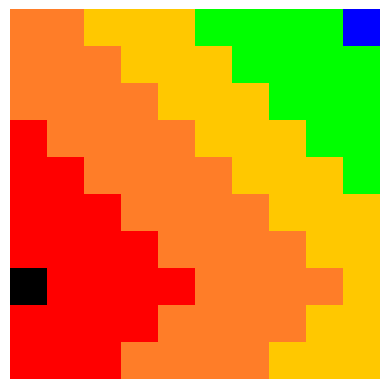

In [106]:

plt.imshow(result)
plt.axis('off')
plt.show()

### Bajo el argumento de maximizar la probabilidad a posteriori, indicar cuál es la celda más probable donde se encuentra el fantasma G, dada la evidencia.

In [107]:
R = (3,6) # Celda donde se realizó la lectura de la evidencia
R_color = "Y" # Color leido en la celda de R

p = 0
new_G = None
# P(g | R_i,j = R_color) ∝ P(R_i,j = R_color | g) P(g)
# g es la posición tentativa del fantasma (i,j)
for i in range(10):
  for j in range(10):

    distance = distancia_manhattan((i,j), R)
    
    # P(R_i,j = R_color | g) = P(R_i,j = R_color y g) / P(g)
    # Simplificando: P(g | R_i,j = R_color) ∝ P(R_i,j = R_color y g)

    curr_p = color_distribution.loc[color_distribution['dist'] == distance, R_color].values[0]

    if curr_p > p:
      p = curr_p
      new_G = (i,j)


print(new_G)

(7, 0)
